<a href="https://colab.research.google.com/github/MAbubakarArshad/Credit_Card_Fraud_Detection/blob/main/Implement_MNIST_using_Auto_Encoders_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing necessary libraries.

In [1]:
#impoting necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense
from keras.layers import Input, Dense
from keras.models import Model
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Load the MNIST dataset and normalize the data

In [2]:
#load the MNIST dataset and normalize the data
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = np.reshape(x_train, (len(x_train), np.prod(x_train.shape[1:])))
x_test = np.reshape(x_test, (len(x_test), np.prod(x_test.shape[1:])))

11490434/11490434 [==============================] - 0s 0us/step


# Define the autoencoder model

In [3]:
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

autoencoder = Model(input_img,decoded)

**Compile the model using the Adam optimizer and mean squared error loss**

In [4]:
autoencoder.compile(optimizer='adam', loss='mse')

# Train the model on the MNIST training set

In [5]:
history = autoencoder.fit(x_train, x_train,
                          epochs=50,
                          batch_size=256,
                          shuffle=True,
                          validation_data=(x_test,x_test))

Epoch 1/50
235/235 [==============================] - 6s 16ms/step - loss: 0.0623 - val_loss: 0.0358
Epoch 2/50
235/235 [==============================] - 5s 19ms/step - loss: 0.0291 - val_loss: 0.0248
Epoch 3/50
235/235 [==============================] - 4s 15ms/step - loss: 0.0226 - val_loss: 0.0205
Epoch 4/50
235/235 [==============================] - 5s 19ms/step - loss: 0.0196 - val_loss: 0.0178
Epoch 5/50
235/235 [==============================] - 6s 26ms/step - loss: 0.0173 - val_loss: 0.0161
Epoch 6/50
235/235 [==============================] - 3s 14ms/step - loss: 0.0158 - val_loss: 0.0148
Epoch 7/50
235/235 [==============================] - 4s 17ms/step - loss: 0.0147 - val_loss: 0.0140
Epoch 8/50
235/235 [==============================] - 5s 19ms/step - loss: 0.0138 - val_loss: 0.0130
Epoch 9/50
235/235 [==============================] - 3s 14ms/step - loss: 0.0131 - val_loss: 0.0127
Epoch 10/50
235/235 [==============================] - 4s 15ms/step - loss: 0.0126 - val_lo

# Model evaluation

dict_keys(['loss', 'val_loss'])


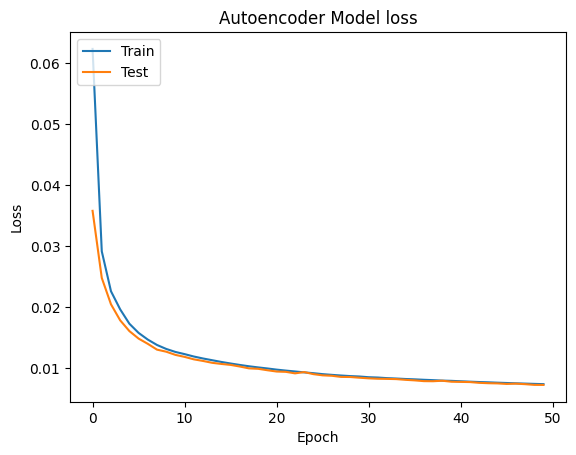

In [6]:

def plotmodelhistory(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Autoencoder Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

# list all data in history
print(history.history.keys())
# visualization of the loss minimization during the training process
plotmodelhistory(history)

**Generate reconstructed images using the trained autoencoder**

313/313 [==============================] - 1s 2ms/step


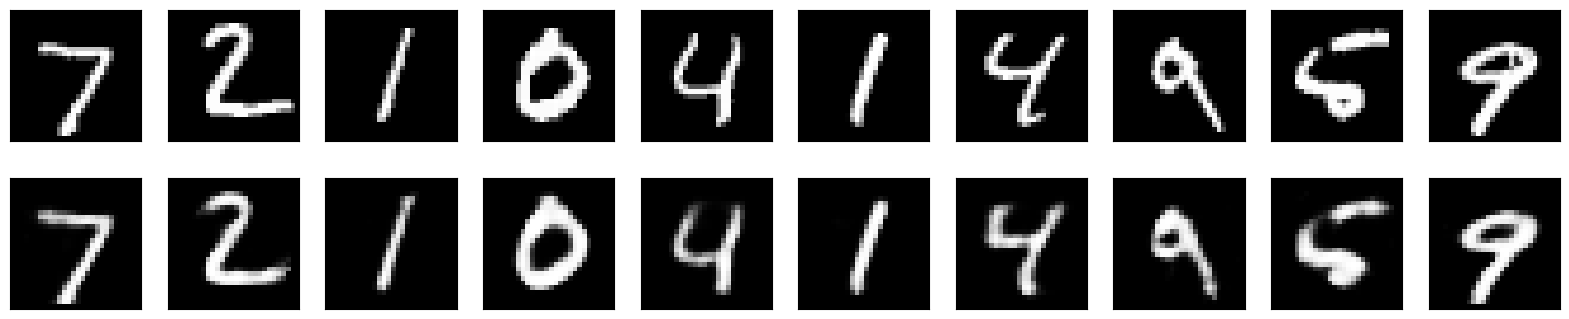

In [7]:
#finally we'll use the trained autoencoder to generate reconstructed images
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()